In [40]:
import csv
import matplotlib.image
import matplotlib.pyplot as plt
import pandas as pd
import numpy
%matplotlib inline

In [41]:
date_list = []
for date in range(20160401, 20160431, 1) :
    date_list.append(date)
for date in range(20160501, 20160521, 1) :
    date_list.append(date)

In [42]:
hps = [pd.read_csv(str(date) + '_hps.csv') for date in date_list]
hps

[      datetime  A01  A02  A03  A04  A05  A06  A07  A08  A09  ...   A089  A090  \
 0     00:00:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 1     00:01:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 2     00:02:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 3     00:03:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 4     00:04:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 5     00:05:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 6     00:06:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 7     00:07:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 8     00:08:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 9     00:09:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 10    00:10:00    0    0    0    0    0    0    0    0    0  ...      0     0   
 11    00:11:00 

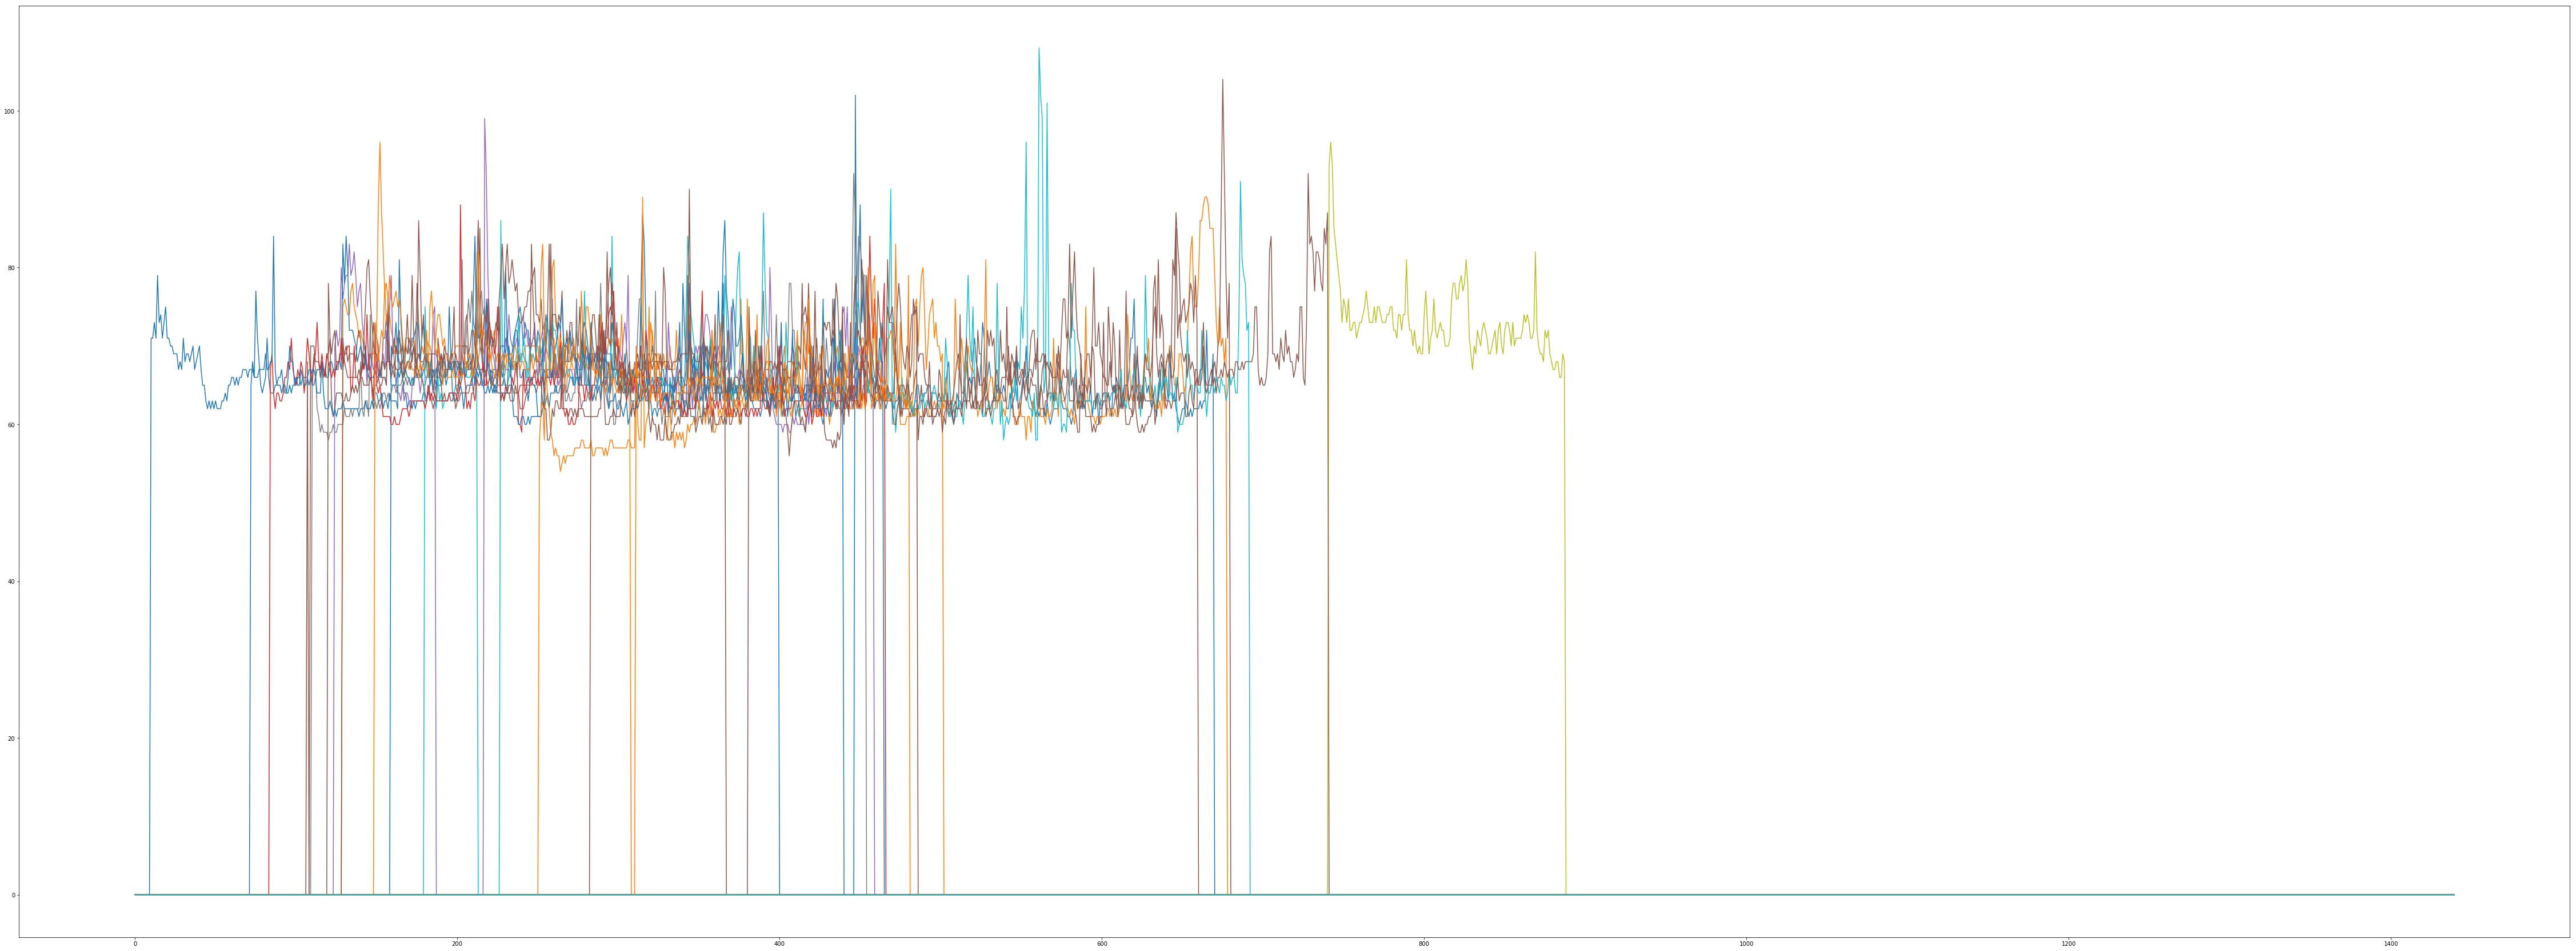

In [43]:
plt.figure(figsize = (80, 30))
for i in range(0, len(date_list), 1) :
    plt.plot(hps[i]['A01'])

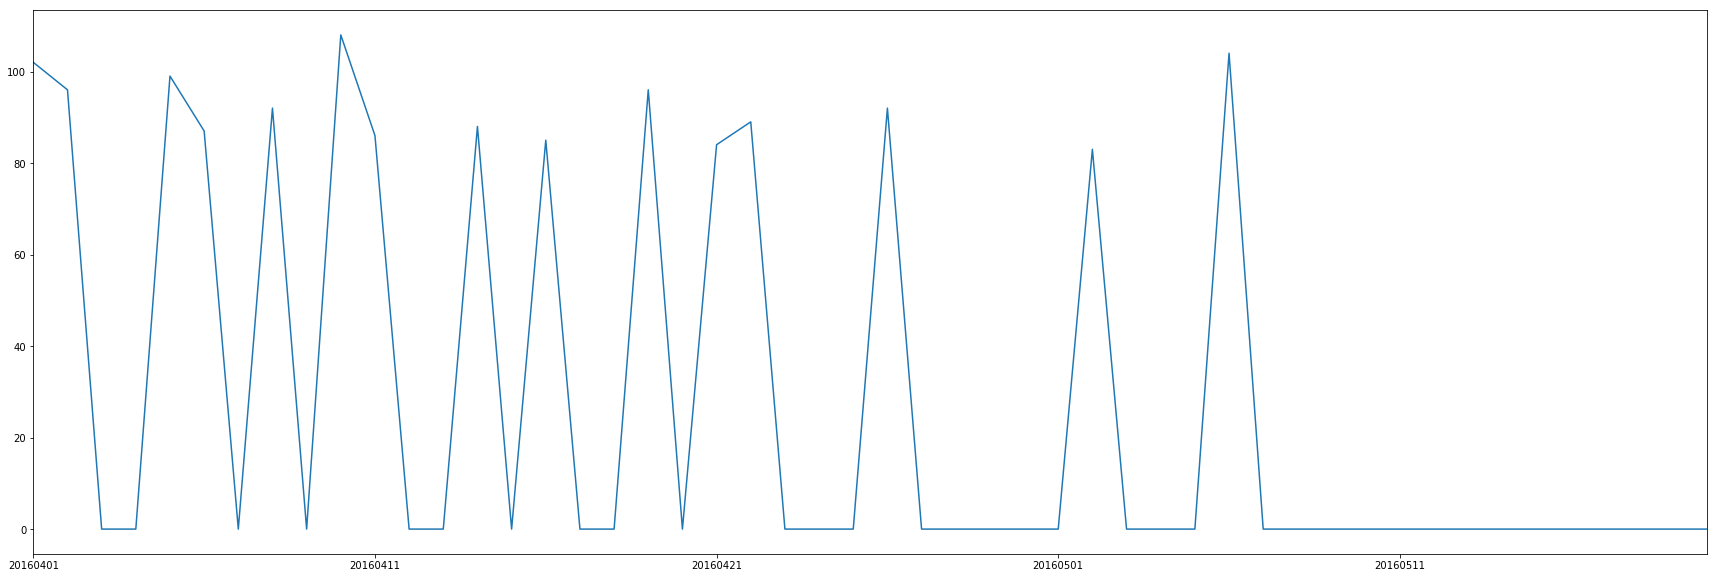

In [44]:
dict_peek = {}
for i, date in enumerate(date_list) :
    dict_peek[str(date)] = hps[i]['A01'].max()
    
dict_peek = pd.Series(dict_peek)
plt.figure(figsize = (30, 10))
dict_peek.plot()

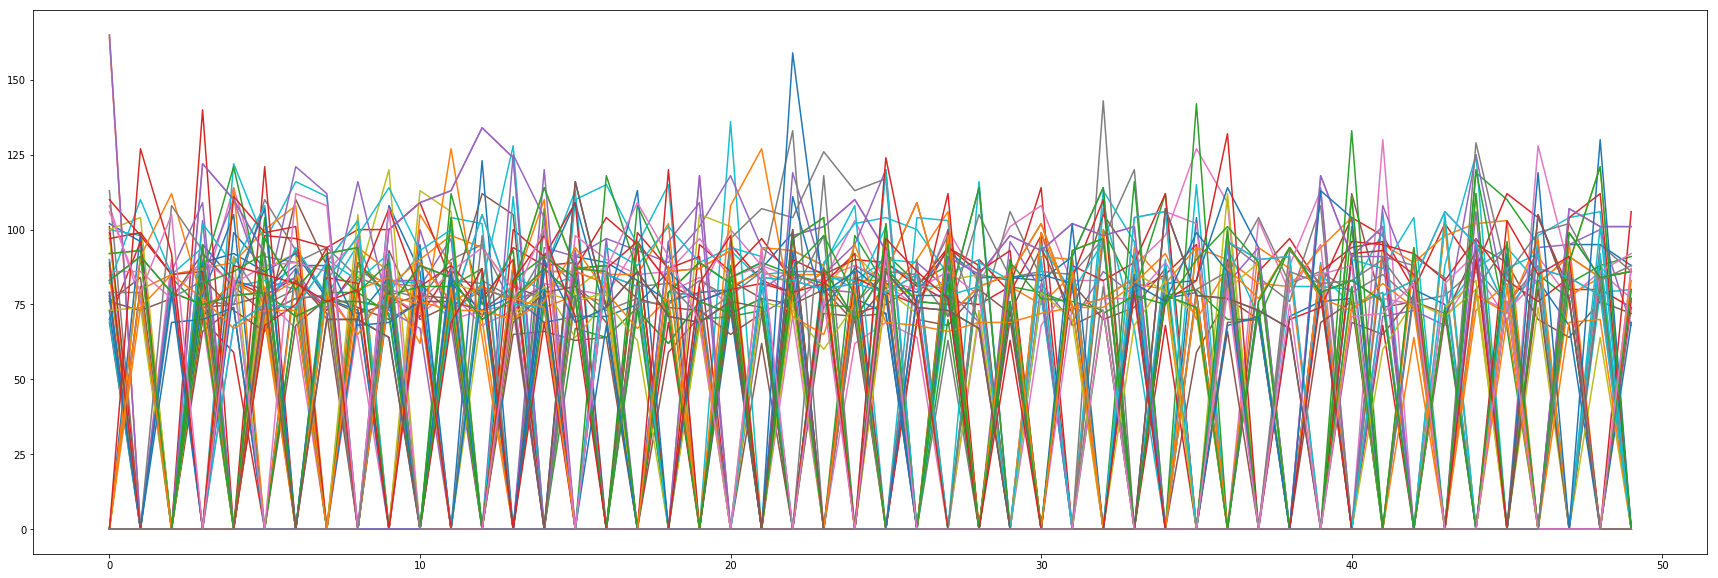

In [45]:
plt.figure(figsize = (30, 10))

for i in range(1, 99, 1) :
    list_peek = []
    userName = 'A0' + str(i)
    
    for j, date in enumerate(date_list) :
        list_peek.append(hps[j][userName].max())
    plt.plot(list_peek)

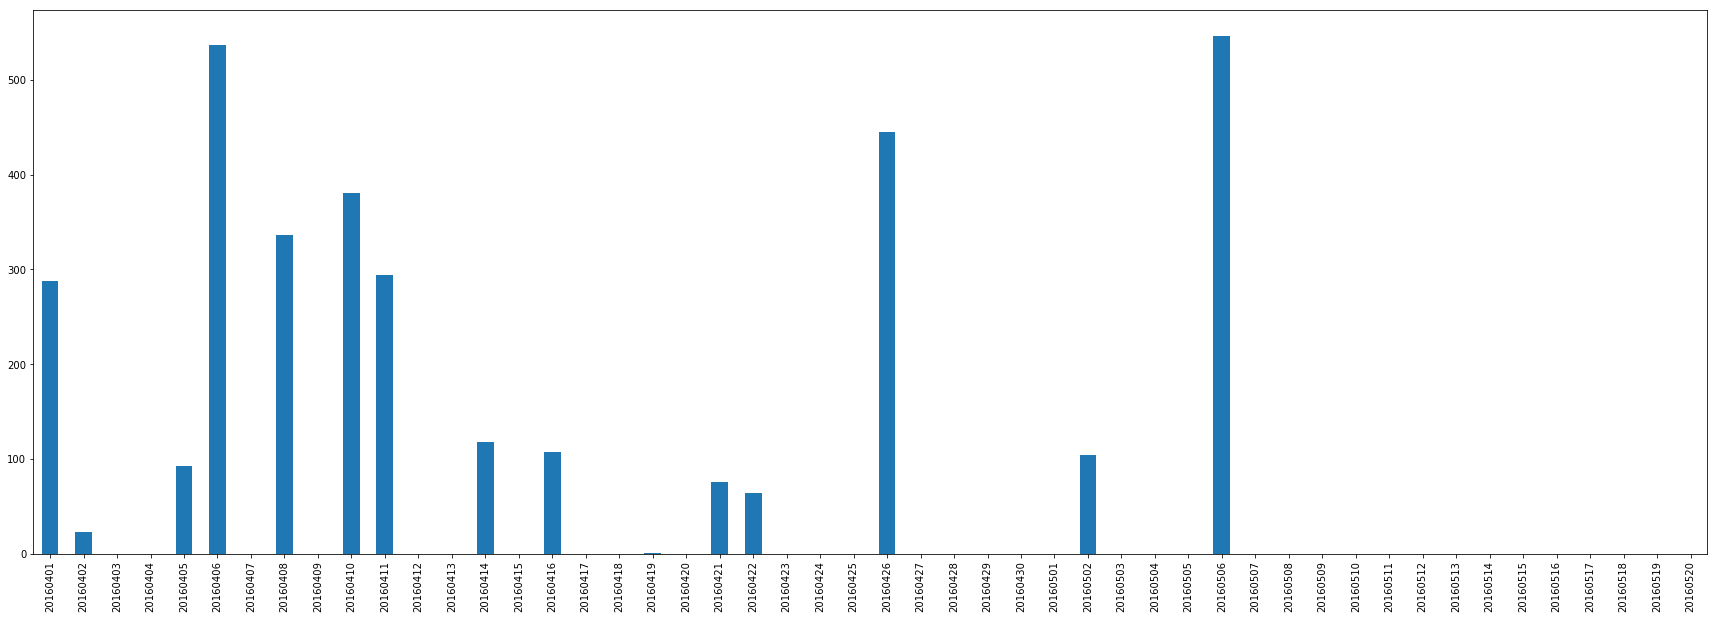

In [46]:
list_sleep = []

for i in range(0, len(date_list), 1) :
    start_sleep = -1
    
    for index, heart in enumerate(hps[i]['A01']):
        if heart != 0 :
            start_sleep = index
            break
    
    if start_sleep is -1 :
        list_sleep.append(0)
    else :
        start_date = hps[i]['datetime'][start_sleep]
        peek_date = hps[i]['datetime'][(hps[i]['A01'].argmax())]
        list_sleep.append(((int(peek_date[0:2]) * 60) + int(peek_date[3:5]))  - ((int(start_date[0:2]) * 60) + int(start_date[3:5])))

dict_sleep = {}
for i, date in enumerate(date_list) :
    dict_sleep[str(date)] = list_sleep[i]

plt.figure(figsize = (30, 10))
pd.Series(dict_sleep).plot(kind = 'bar')

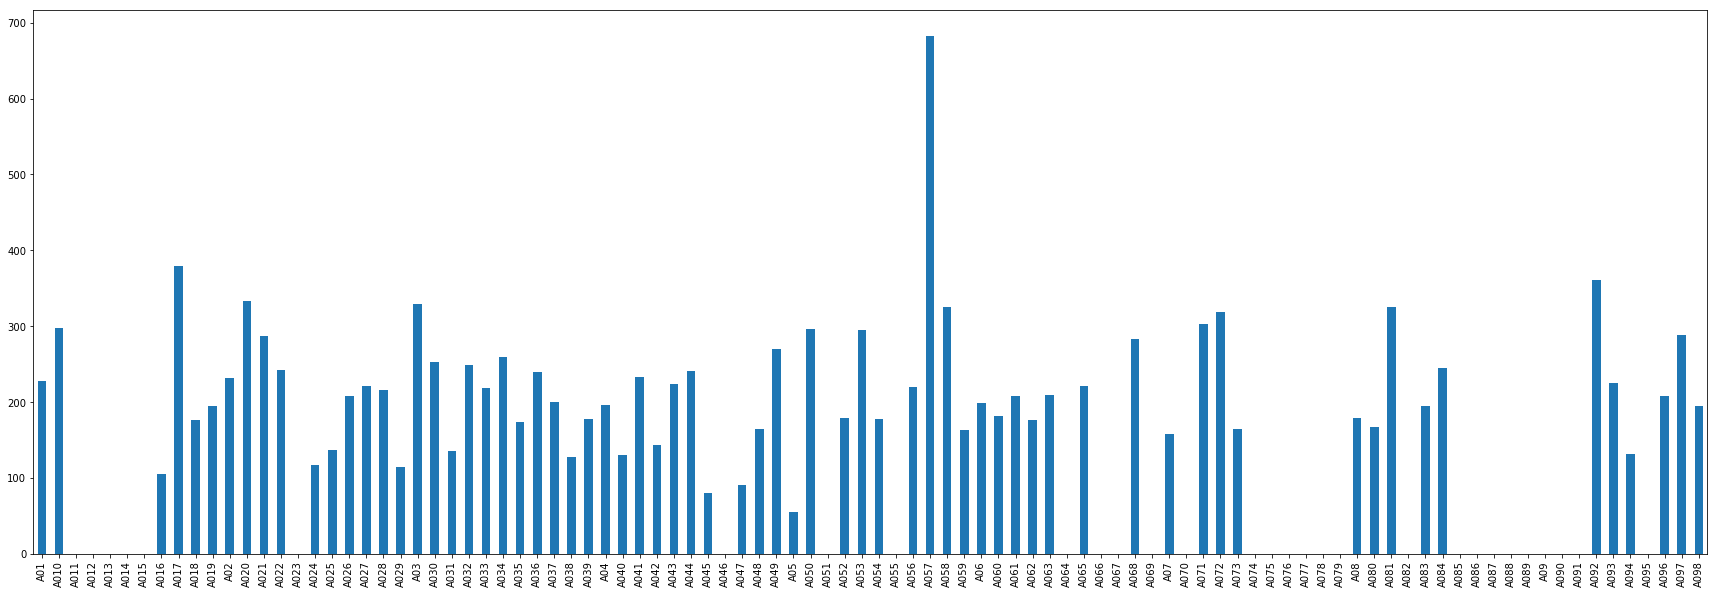

In [47]:
avg_dream = []

for i in range(1, 99, 1) :
    list_sleep = []
    userName = 'A0' + str(i)
    
    for date in range(0, len(date_list), 1) :
        start_sleep = -1

        for index, heart in enumerate(hps[date][userName]):
            if heart != 0 :
                start_sleep = index
                break

        if start_sleep is -1 :
            continue
        else :
            start_date = hps[date]['datetime'][start_sleep]
            peek_date = hps[date]['datetime'][(hps[date][userName].argmax())]
            list_sleep.append(((int(peek_date[0:2]) * 60) + int(peek_date[3:5]))  - ((int(start_date[0:2]) * 60) + int(start_date[3:5])))

    avg_dream.append(numpy.average(list_sleep) if (len(list_sleep) is not 0) else 0)

dict_dream = {}
for i in range(1, 99, 1) :
    dict_dream['A0' + str(i)] = avg_dream[i - 1]

plt.figure(figsize = (30, 10))
pd.Series(dict_dream).plot(kind = 'bar')

In [48]:
start_dream = numpy.average(avg_dream)
start_dream

152.64391469179375

In [49]:
hour = int(start_dream / 60)
minute = int(start_dream % 60)
print(str(hour) + 'h: ' + str(minute) + 'm')

2h: 32m
